In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dnd-5e-monsters/dnd_monsters.csv


## Create a DataFrame for the monsters file and explore the data

In [2]:
# Read the data into a DataFrame

monsters_df = pd.read_csv('/kaggle/input/dnd-5e-monsters/dnd_monsters.csv')
monsters_df.head()

,name,url,cr,type,size,ac,hp,speed,align,legendary,source,str,dex,con,int,wis,cha
0,aarakocra,https://www.aidedd.org/dnd/monstres.php?vo=aar...,1/4,humanoid (aarakocra),Medium,12,13,fly,neutral good,NaN,Monster Manual (BR),10.0,14.0,10.0,11.0,12.0,11.0
1,abjurer,NaN,9,humanoid (any race),Medium,12,84,NaN,any alignment,NaN,Volo's Guide to Monsters,NaN,NaN,NaN,NaN,NaN,NaN
2,aboleth,https://www.aidedd.org/dnd/monstres.php?vo=abo...,10,aberration,Large,17,135,swim,lawful evil,Legendary,Monster Manual (SRD),21.0,9.0,15.0,18.0,15.0,18.0
3,abominable-yeti,NaN,9,monstrosity,Huge,15,137,NaN,chaotic evil,NaN,Monster Manual,NaN,NaN,NaN,NaN,NaN,NaN
4,acererak,NaN,23,undead,Medium,21,285,NaN,neutral evil,NaN,Adventures (Tomb of Annihilation),NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Get the shape of the data

monsters_df.shape

(762, 17)

In [4]:
# Get info about the DataFrame

monsters_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 762 entries, 0 to 761
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       762 non-null    object 
 1   url        401 non-null    object 
 2   cr         761 non-null    object 
 3   type       762 non-null    object 
 4   size       762 non-null    object 
 5   ac         762 non-null    int64  
 6   hp         762 non-null    int64  
 7   speed      248 non-null    object 
 8   align      762 non-null    object 
 9   legendary  43 non-null     object 
 10  source     762 non-null    object 
 11  str        401 non-null    float64
 12  dex        401 non-null    float64
 13  con        401 non-null    float64
 14  int        401 non-null    float64
 15  wis        401 non-null    float64
 16  cha        401 non-null    float64
dtypes: float64(6), int64(2), object(9)
memory usage: 101.3+ KB


In [5]:
# Find the legendary monsters

monsters_df[monsters_df['legendary'] == 'Legendary']

,name,url,cr,type,size,ac,hp,speed,align,legendary,source,str,dex,con,int,wis,cha
2,aboleth,https://www.aidedd.org/dnd/monstres.php?vo=abo...,10,aberration,Large,17,135,swim,lawful evil,Legendary,Monster Manual (SRD),21.0,9.0,15.0,18.0,15.0,18.0
6,adult-black-dragon,https://www.aidedd.org/dnd/monstres.php?vo=adu...,14,dragon,Huge,19,195,"fly, swim",chaotic evil,Legendary,Monster Manual (SRD),23.0,14.0,21.0,14.0,13.0,17.0
7,adult-blue-dracolich,NaN,17,undead,Huge,19,225,fly,lawful evil,Legendary,Monster Manual,NaN,NaN,NaN,NaN,NaN,NaN
8,adult-blue-dragon,https://www.aidedd.org/dnd/monstres.php?vo=adu...,16,dragon,Huge,19,225,fly,lawful evil,Legendary,Monster Manual (SRD),25.0,10.0,23.0,16.0,15.0,19.0
9,adult-brass-dragon,https://www.aidedd.org/dnd/monstres.php?vo=adu...,13,dragon,Huge,18,172,fly,chaotic good,Legendary,Monster Manual (SRD),23.0,10.0,21.0,14.0,13.0,17.0
10,adult-bronze-dragon,https://www.aidedd.org/dnd/monstres.php?vo=adu...,15,dragon,Huge,19,212,"fly, swim",lawful good,Legendary,Monster Manual (SRD),25.0,10.0,23.0,16.0,15.0,19.0
11,adult-copper-dragon,https://www.aidedd.org/dnd/monstres.php?vo=adu...,14,dragon,Huge,18,184,fly,chaotic good,Legendary,Monster Manual (SRD),23.0,12.0,21.0,18.0,15.0,17.0
12,adult-gold-dragon,https://www.aidedd.org/dnd/monstres.php?vo=adu...,17,dragon,Huge,19,256,"fly, swim",lawful good,Legendary,Monster Manual (SRD),27.0,14.0,25.0,16.0,15.0,24.0
13,adult-green-dragon,https://www.aidedd.org/dnd/monstres.php?vo=adu...,15,dragon,Huge,19,207,"fly, swim",lawful evil,Legendary,Monster Manual (SRD),23.0,12.0,21.0,18.0,15.0,17.0
16,adult-red-dragon,https://www.aidedd.org/dnd/monstres.php?vo=adu...,17,dragon,Huge,19,256,fly,chaotic evil,Legendary,Monster Manual (SRD),27.0,10.0,25.0,16.0,13.0,21.0


In [6]:
# Get averages for all monsters
monsters_df[['ac','hp','str','dex','con','int','wis','cha']].mean().round(1)


ac     14.6
hp     88.1
str    15.2
dex    12.7
con    15.1
int     8.3
wis    11.8
cha    10.1
dtype: float64

In [7]:
# Get average stats by size

monsters_df.groupby(monsters_df['size'])[['ac','hp','str','dex','con','int','wis','cha']].mean().round(1)


,ac,hp,str,dex,con,int,wis,cha
size,,,,,,,,
Gargantuan,19.8,379.0,28.2,10.5,25.6,13.5,14.4,17.5
Huge,16.4,189.9,22.8,11.3,19.9,9.7,12.9,12.4
Large,14.7,101.1,18.3,12.6,16.3,7.8,12.2,9.9
Medium,14.3,61.9,13.1,12.9,13.6,8.9,11.6,10.1
Small,12.9,18.1,7.6,13.4,11.1,6.0,9.7,7.0
Tiny,12.8,8.5,3.3,15.0,9.9,4.4,10.6,5.8


In [8]:
# Get average stats by size

monsters_df.groupby(monsters_df['type'])[['ac','hp','str','dex','con','int','wis','cha']].mean().sort_values('int',ascending=False).dropna().round(1)

,ac,hp,str,dex,con,int,wis,cha
type,,,,,,,,
undead (shapechanger),16.0,144.0,18.0,18.0,18.0,17.0,15.0,18.0
celestial,17.1,136.3,20.0,18.2,19.3,16.7,19.8,20.3
"monstrosity (shapechanger, yuan-ti)",14.2,102.0,17.0,14.7,14.3,15.0,13.0,16.7
fiend (demon),16.4,173.5,17.8,13.9,19.4,15.0,15.1,16.0
humanoid (human),14.9,76.7,14.5,15.0,17.0,15.0,15.5,14.5
fiend (devil),17.2,158.5,19.8,15.2,19.0,14.6,15.3,17.2
humanoid (elf),16.1,123.2,11.0,15.5,12.2,14.0,14.8,14.2
fiend (shapechanger),16.0,78.0,13.5,16.0,13.5,14.0,12.0,17.0
dragon,18.1,190.6,22.0,11.2,20.4,13.9,13.1,16.8


In [9]:
# Find all monsters that are type "undead (shapechanger)"

monsters_df.loc[monsters_df['type']=="undead (shapechanger)"]

,name,url,cr,type,size,ac,hp,speed,align,legendary,source,str,dex,con,int,wis,cha
625,strahd-von-zarovich,NaN,15,undead (shapechanger),Medium,16,144,NaN,lawful evil,NaN,Adventures (Curse of Strahd),NaN,NaN,NaN,NaN,NaN,NaN
675,vampire,https://www.aidedd.org/dnd/monstres.php?vo=vam...,13,undead (shapechanger),Medium,16,144,NaN,lawful evil,Legendary,Monster Manual (SRD),18.0,18.0,18.0,17.0,15.0,18.0


In [10]:
# Get count of each type

pd.DataFrame(monsters_df.groupby(monsters_df['type']).size())

,0
type,
aberration,34
aberration (shapechanger),3
beast,106
celestial,7
celestial (titan),1
...,...
plant,24
swarm of Tiny beasts,8
undead,47


In [11]:
attr_list = ['ac','hp','str','dex','con','int','wis','cha']

for item in attr_list:
        print(f'Max {item.upper()}:\n')
        display(monsters_df.sort_values(item,ascending=False).dropna(subset=item).iloc[0:5].drop(columns='url'))
        print(f'\n\n\n')

Max AC:



,name,cr,type,size,ac,hp,speed,align,legendary,source,str,dex,con,int,wis,cha
643,tarrasque,30,monstrosity (titan),Gargantuan,25,676,NaN,unaligned,Legendary,Monster Manual (SRD),30.0,11.0,30.0,3.0,11.0,11.0
652,tiamat,30,fiend,Gargantuan,25,615,fly,chaotic evil,NaN,Adventures (Tyranny of Dragons),NaN,NaN,NaN,NaN,NaN,NaN
389,jarlaxle-baenre,15,humanoid (elf),Medium,24,123,NaN,chaotic neutral,NaN,Adventures (Dragon Heist),NaN,NaN,NaN,NaN,NaN,NaN
730,yan-c-bin,18,elemental,Huge,22,283,fly,neutral evil,NaN,Adventures (Princes of the Apocalypse),NaN,NaN,NaN,NaN,NaN,NaN
539,red-abishai,19,fiend (devil),Medium,22,255,fly,lawful evil,NaN,Mordenkainen's Tome of Foes,NaN,NaN,NaN,NaN,NaN,NaN






Max HP:



,name,cr,type,size,ac,hp,speed,align,legendary,source,str,dex,con,int,wis,cha
643,tarrasque,30,monstrosity (titan),Gargantuan,25,676,NaN,unaligned,Legendary,Monster Manual (SRD),30.0,11.0,30.0,3.0,11.0,11.0
652,tiamat,30,fiend,Gargantuan,25,615,fly,chaotic evil,NaN,Adventures (Tyranny of Dragons),NaN,NaN,NaN,NaN,NaN,NaN
759,zariel,26,fiend (devil),Large,21,580,fly,lawful evil,Legendary,Mordenkainen's Tome of Foes,27.0,24.0,28.0,26.0,27.0,30.0
36,ancient-red-dragon,24,dragon,Gargantuan,22,546,fly,chaotic evil,Legendary,Monster Manual (SRD),30.0,10.0,29.0,18.0,15.0,23.0
34,ancient-gold-dragon,24,dragon,Gargantuan,22,546,"fly, swim",lawful good,Legendary,Monster Manual (SRD),30.0,14.0,29.0,18.0,17.0,28.0






Max STR:



,name,cr,type,size,ac,hp,speed,align,legendary,source,str,dex,con,int,wis,cha
36,ancient-red-dragon,24,dragon,Gargantuan,22,546,fly,chaotic evil,Legendary,Monster Manual (SRD),30.0,10.0,29.0,18.0,15.0,23.0
401,kraken,23,monstrosity (titan),Gargantuan,18,472,swim,chaotic evil,Legendary,Monster Manual (SRD),30.0,11.0,25.0,22.0,18.0,20.0
34,ancient-gold-dragon,24,dragon,Gargantuan,22,546,"fly, swim",lawful good,Legendary,Monster Manual (SRD),30.0,14.0,29.0,18.0,17.0,28.0
643,tarrasque,30,monstrosity (titan),Gargantuan,25,676,NaN,unaligned,Legendary,Monster Manual (SRD),30.0,11.0,30.0,3.0,11.0,11.0
38,ancient-silver-dragon,23,dragon,Gargantuan,22,487,fly,lawful good,Legendary,Monster Manual (SRD),30.0,10.0,29.0,18.0,15.0,23.0






Max DEX:



,name,cr,type,size,ac,hp,speed,align,legendary,source,str,dex,con,int,wis,cha
717,will-o--wisp,2,undead,Tiny,19,22,fly,chaotic evil,NaN,Monster Manual (SRD),1.0,28.0,10.0,13.0,14.0,11.0
759,zariel,26,fiend (devil),Large,21,580,fly,lawful evil,Legendary,Mordenkainen's Tome of Foes,27.0,24.0,28.0,26.0,27.0,30.0
585,solar,21,celestial,Large,21,243,fly,lawful good,Legendary,Monster Manual (SRD),26.0,22.0,26.0,25.0,25.0,30.0
517,planetar,16,celestial,Large,19,200,fly,lawful good,NaN,Monster Manual (SRD),24.0,20.0,24.0,19.0,22.0,25.0
428,marilith,16,fiend (demon),Large,18,189,NaN,chaotic evil,NaN,Monster Manual (SRD),18.0,20.0,20.0,18.0,16.0,20.0






Max CON:



,name,cr,type,size,ac,hp,speed,align,legendary,source,str,dex,con,int,wis,cha
643,tarrasque,30,monstrosity (titan),Gargantuan,25,676,NaN,unaligned,Legendary,Monster Manual (SRD),30.0,11.0,30.0,3.0,11.0,11.0
34,ancient-gold-dragon,24,dragon,Gargantuan,22,546,"fly, swim",lawful good,Legendary,Monster Manual (SRD),30.0,14.0,29.0,18.0,17.0,28.0
36,ancient-red-dragon,24,dragon,Gargantuan,22,546,fly,chaotic evil,Legendary,Monster Manual (SRD),30.0,10.0,29.0,18.0,15.0,23.0
38,ancient-silver-dragon,23,dragon,Gargantuan,22,487,fly,lawful good,Legendary,Monster Manual (SRD),30.0,10.0,29.0,18.0,15.0,23.0
759,zariel,26,fiend (devil),Large,21,580,fly,lawful evil,Legendary,Mordenkainen's Tome of Foes,27.0,24.0,28.0,26.0,27.0,30.0






Max INT:



,name,cr,type,size,ac,hp,speed,align,legendary,source,str,dex,con,int,wis,cha
759,zariel,26,fiend (devil),Large,21,580,fly,lawful evil,Legendary,Mordenkainen's Tome of Foes,27.0,24.0,28.0,26.0,27.0,30.0
585,solar,21,celestial,Large,21,243,fly,lawful good,Legendary,Monster Manual (SRD),26.0,22.0,26.0,25.0,25.0,30.0
576,sibriex,18,fiend (demon),Huge,19,150,fly,chaotic evil,Legendary,Mordenkainen's Tome of Foes,10.0,3.0,23.0,25.0,24.0,25.0
401,kraken,23,monstrosity (titan),Gargantuan,18,472,swim,chaotic evil,Legendary,Monster Manual (SRD),30.0,11.0,25.0,22.0,18.0,20.0
515,pit-fiend,20,fiend (devil),Large,19,300,fly,lawful evil,NaN,Monster Manual (SRD),26.0,14.0,24.0,22.0,18.0,24.0






Max WIS:



,name,cr,type,size,ac,hp,speed,align,legendary,source,str,dex,con,int,wis,cha
759,zariel,26,fiend (devil),Large,21,580,fly,lawful evil,Legendary,Mordenkainen's Tome of Foes,27.0,24.0,28.0,26.0,27.0,30.0
585,solar,21,celestial,Large,21,243,fly,lawful good,Legendary,Monster Manual (SRD),26.0,22.0,26.0,25.0,25.0,30.0
576,sibriex,18,fiend (demon),Huge,19,150,fly,chaotic evil,Legendary,Mordenkainen's Tome of Foes,10.0,3.0,23.0,25.0,24.0,25.0
517,planetar,16,celestial,Large,19,200,fly,lawful good,NaN,Monster Manual (SRD),24.0,20.0,24.0,19.0,22.0,25.0
195,drow-inquisitor,14,humanoid (elf),Medium,16,143,NaN,neutral evil,NaN,Mordenkainen's Tome of Foes,11.0,15.0,14.0,16.0,21.0,20.0






Max CHA:



,name,cr,type,size,ac,hp,speed,align,legendary,source,str,dex,con,int,wis,cha
585,solar,21,celestial,Large,21,243,fly,lawful good,Legendary,Monster Manual (SRD),26.0,22.0,26.0,25.0,25.0,30.0
759,zariel,26,fiend (devil),Large,21,580,fly,lawful evil,Legendary,Mordenkainen's Tome of Foes,27.0,24.0,28.0,26.0,27.0,30.0
34,ancient-gold-dragon,24,dragon,Gargantuan,22,546,"fly, swim",lawful good,Legendary,Monster Manual (SRD),30.0,14.0,29.0,18.0,17.0,28.0
576,sibriex,18,fiend (demon),Huge,19,150,fly,chaotic evil,Legendary,Mordenkainen's Tome of Foes,10.0,3.0,23.0,25.0,24.0,25.0
517,planetar,16,celestial,Large,19,200,fly,lawful good,NaN,Monster Manual (SRD),24.0,20.0,24.0,19.0,22.0,25.0


In [12]:
# Get Minimum Values
for item in attr_list:
        print(f'Min {item.upper()}:\n',)
        display(monsters_df.sort_values(item,ascending=True).dropna(subset=item).iloc[0:5].drop(columns='url'))
        print(f'\n\n\n')

Min AC:



,name,cr,type,size,ac,hp,speed,align,legendary,source,str,dex,con,int,wis,cha
22,aldani,NaN,monstrosity,Medium,0,0,swim,lawful neutral,NaN,Adventures (Tomb of Annihilation),NaN,NaN,NaN,NaN,NaN,NaN
575,shrieker,0,plant,Medium,5,13,NaN,unaligned,NaN,Monster Manual (SRD),1.0,1.0,10.0,1.0,3.0,1.0
262,gas-spore,1/2,plant,Large,5,1,fly,unaligned,NaN,Monster Manual,NaN,NaN,NaN,NaN,NaN,NaN
686,violet-fungus,1/4,plant,Medium,5,18,NaN,unaligned,NaN,Monster Manual (SRD),3.0,1.0,10.0,1.0,3.0,1.0
265,gelatinous-cube,2,ooze,Large,6,84,NaN,unaligned,NaN,Monster Manual (SRD),14.0,3.0,20.0,1.0,6.0,1.0






Min HP:



,name,cr,type,size,ac,hp,speed,align,legendary,source,str,dex,con,int,wis,cha
22,aldani,NaN,monstrosity,Medium,0,0,swim,lawful neutral,NaN,Adventures (Tomb of Annihilation),NaN,NaN,NaN,NaN,NaN,NaN
352,hawk,0,beast,Tiny,13,1,fly,unaligned,NaN,Monster Manual (SRD),5.0,16.0,8.0,2.0,14.0,6.0
506,owl,0,beast,Tiny,11,1,fly,unaligned,NaN,Monster Manual (SRD),3.0,13.0,8.0,2.0,12.0,7.0
534,quipper,0,beast,Tiny,13,1,swim,unaligned,NaN,Monster Manual (SRD),2.0,16.0,9.0,1.0,7.0,2.0
536,rat,0,beast,Tiny,10,1,NaN,unaligned,NaN,Monster Manual (SRD),2.0,11.0,9.0,2.0,10.0,4.0






Min STR:



,name,cr,type,size,ac,hp,speed,align,legendary,source,str,dex,con,int,wis,cha
575,shrieker,0,plant,Medium,5,13,NaN,unaligned,NaN,Monster Manual (SRD),1.0,1.0,10.0,1.0,3.0,1.0
255,frog,0,beast,Tiny,11,1,swim,unaligned,NaN,Monster Manual (SRD),1.0,13.0,8.0,1.0,8.0,3.0
717,will-o--wisp,2,undead,Tiny,19,22,fly,chaotic evil,NaN,Monster Manual (SRD),1.0,28.0,10.0,13.0,14.0,11.0
247,flameskull,4,undead,Tiny,13,40,fly,neutral evil,NaN,Monster Manual (SRD),1.0,17.0,14.0,16.0,10.0,11.0
71,banshee,4,undead,Medium,12,58,fly,chaotic evil,NaN,Monster Manual (SRD),1.0,14.0,10.0,12.0,11.0,17.0






Min DEX:



,name,cr,type,size,ac,hp,speed,align,legendary,source,str,dex,con,int,wis,cha
575,shrieker,0,plant,Medium,5,13,NaN,unaligned,NaN,Monster Manual (SRD),1.0,1.0,10.0,1.0,3.0,1.0
686,violet-fungus,1/4,plant,Medium,5,18,NaN,unaligned,NaN,Monster Manual (SRD),3.0,1.0,10.0,1.0,3.0,1.0
576,sibriex,18,fiend (demon),Huge,19,150,fly,chaotic evil,Legendary,Mordenkainen's Tome of Foes,10.0,3.0,23.0,25.0,24.0,25.0
265,gelatinous-cube,2,ooze,Large,6,84,NaN,unaligned,NaN,Monster Manual (SRD),14.0,3.0,20.0,1.0,6.0,1.0
409,lemure,0,fiend (devil),Medium,7,13,NaN,lawful evil,NaN,Monster Manual (SRD),10.0,5.0,11.0,1.0,11.0,3.0






Min CON:



,name,cr,type,size,ac,hp,speed,align,legendary,source,str,dex,con,int,wis,cha
706,weasel,0,beast,Tiny,13,1,NaN,unaligned,NaN,Monster Manual (SRD),3.0,16.0,8.0,2.0,12.0,3.0
78,bat,0,beast,Tiny,12,1,fly,unaligned,NaN,Monster Manual (SRD),2.0,15.0,8.0,2.0,12.0,4.0
352,hawk,0,beast,Tiny,13,1,fly,unaligned,NaN,Monster Manual (SRD),5.0,16.0,8.0,2.0,14.0,6.0
635,swarm-of-ravens,1/4,swarm of Tiny beasts,Medium,12,24,fly,unaligned,NaN,Monster Manual (SRD),6.0,14.0,8.0,3.0,12.0,6.0
506,owl,0,beast,Tiny,11,1,fly,unaligned,NaN,Monster Manual (SRD),3.0,13.0,8.0,2.0,12.0,7.0






Min INT:



,name,cr,type,size,ac,hp,speed,align,legendary,source,str,dex,con,int,wis,cha
137,constrictor-snake,1/4,beast,Large,12,13,swim,unaligned,NaN,Monster Manual (SRD),15.0,14.0,12.0,1.0,10.0,3.0
575,shrieker,0,plant,Medium,5,13,NaN,unaligned,NaN,Monster Manual (SRD),1.0,1.0,10.0,1.0,3.0,1.0
566,sea-horse,0,beast,Tiny,11,1,swim,unaligned,NaN,Monster Manual (SRD),1.0,12.0,8.0,1.0,10.0,2.0
563,scorpion,0,beast,Tiny,11,1,NaN,unaligned,NaN,Monster Manual (SRD),2.0,11.0,8.0,1.0,8.0,2.0
553,rug-of-smothering,2,construct,Large,12,33,NaN,unaligned,NaN,Monster Manual (SRD),17.0,14.0,10.0,1.0,3.0,1.0






Min WIS:



,name,cr,type,size,ac,hp,speed,align,legendary,source,str,dex,con,int,wis,cha
636,swarm-of-rot-grubs,1/2,swarm of Tiny beasts,Medium,8,22,NaN,unaligned,NaN,Volo's Guide to Monsters,2.0,7.0,10.0,1.0,2.0,1.0
575,shrieker,0,plant,Medium,5,13,NaN,unaligned,NaN,Monster Manual (SRD),1.0,1.0,10.0,1.0,3.0,1.0
686,violet-fungus,1/4,plant,Medium,5,18,NaN,unaligned,NaN,Monster Manual (SRD),3.0,1.0,10.0,1.0,3.0,1.0
553,rug-of-smothering,2,construct,Large,12,33,NaN,unaligned,NaN,Monster Manual (SRD),17.0,14.0,10.0,1.0,3.0,1.0
41,animated-armor,1,construct,Medium,18,33,NaN,unaligned,NaN,Monster Manual (SRD),14.0,11.0,13.0,1.0,3.0,1.0






Min CHA:



,name,cr,type,size,ac,hp,speed,align,legendary,source,str,dex,con,int,wis,cha
41,animated-armor,1,construct,Medium,18,33,NaN,unaligned,NaN,Monster Manual (SRD),14.0,11.0,13.0,1.0,3.0,1.0
91,black-pudding,4,ooze,Large,7,85,NaN,unaligned,NaN,Monster Manual (SRD),16.0,5.0,16.0,1.0,6.0,1.0
621,stone-golem,10,construct,Large,17,178,NaN,unaligned,NaN,Monster Manual (SRD),22.0,9.0,20.0,3.0,11.0,1.0
265,gelatinous-cube,2,ooze,Large,6,84,NaN,unaligned,NaN,Monster Manual (SRD),14.0,3.0,20.0,1.0,6.0,1.0
385,iron-golem,16,construct,Large,20,210,NaN,unaligned,NaN,Monster Manual (SRD),24.0,9.0,20.0,3.0,11.0,1.0


In [13]:
# Use Matplotlib to further explore the data
%matplotlib inline 
import matplotlib.pyplot as plt

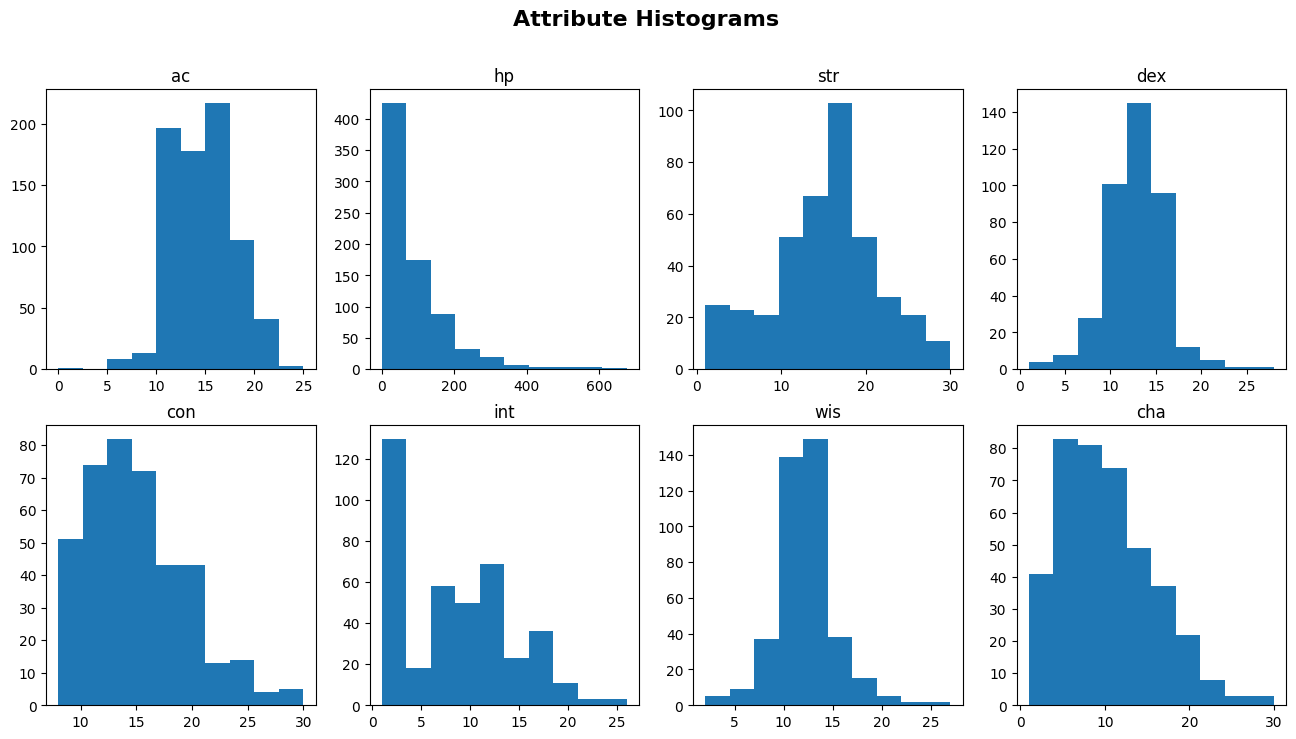

In [14]:
# Use previous list to iterate over attributes and create histograms

fig, [[ax0, ax1, ax2, ax3], [ax4, ax5, ax6, ax7]] = plt.subplots(figsize=(16,8),
                                                                 nrows=2,
                                                                 ncols=4)
# Add title to complete figure
fig.suptitle("Attribute Histograms", fontsize=16, fontweight='bold')

# Add data and titles to plots
ax0.hist(monsters_df['ac'])
ax0.set_title('ac')

ax1.hist(monsters_df['hp'])
ax1.set_title('hp')

ax2.hist(monsters_df['str'])
ax2.set_title('str')

ax3.hist(monsters_df['dex'])
ax3.set_title('dex')

ax4.hist(monsters_df['con'])
ax4.set_title('con')

ax5.hist(monsters_df['int'])
ax5.set_title('int')

ax6.hist(monsters_df['wis'])
ax6.set_title('wis')

ax7.hist(monsters_df['cha'])
ax7.set_title('cha');

In [15]:
# Get Pearson correlation coeff
monsters_df[['ac','hp','str','dex','con','int','wis','cha']].corr(method='pearson')

,ac,hp,str,dex,con,int,wis,cha
ac,1.000000,0.664352,0.589242,0.212426,0.686334,0.598366,0.498176,0.642748
hp,0.664352,1.000000,0.729654,-0.037904,0.871122,0.528713,0.499466,0.625515
str,0.589242,0.729654,1.000000,-0.192704,0.837820,0.345380,0.372775,0.461420
dex,0.212426,-0.037904,-0.192704,1.000000,-0.156051,0.248794,0.343922,0.235432
con,0.686334,0.871122,0.837820,-0.156051,1.000000,0.480193,0.451155,0.583351
int,0.598366,0.528713,0.345380,0.248794,0.480193,1.000000,0.649557,0.899798
wis,0.498176,0.499466,0.372775,0.343922,0.451155,0.649557,1.000000,0.725555
cha,0.642748,0.625515,0.461420,0.235432,0.583351,0.899798,0.725555,1.000000


In [16]:
# Get Pearson correlation coeff
monsters_df[['ac','hp','str','dex','con','int','wis','cha']].corr(method='spearman')

,ac,hp,str,dex,con,int,wis,cha
ac,1.000000,0.667573,0.552670,0.140589,0.626509,0.572412,0.412475,0.586041
hp,0.667573,1.000000,0.811969,-0.113394,0.879658,0.539536,0.453799,0.583416
str,0.552670,0.811969,1.000000,-0.285419,0.848378,0.311860,0.336519,0.398483
dex,0.140589,-0.113394,-0.285419,1.000000,-0.233516,0.199506,0.238873,0.177807
con,0.626509,0.879658,0.848378,-0.233516,1.000000,0.419303,0.375204,0.479367
int,0.572412,0.539536,0.311860,0.199506,0.419303,1.000000,0.585615,0.907501
wis,0.412475,0.453799,0.336519,0.238873,0.375204,0.585615,1.000000,0.646703
cha,0.586041,0.583416,0.398483,0.177807,0.479367,0.907501,0.646703,1.000000


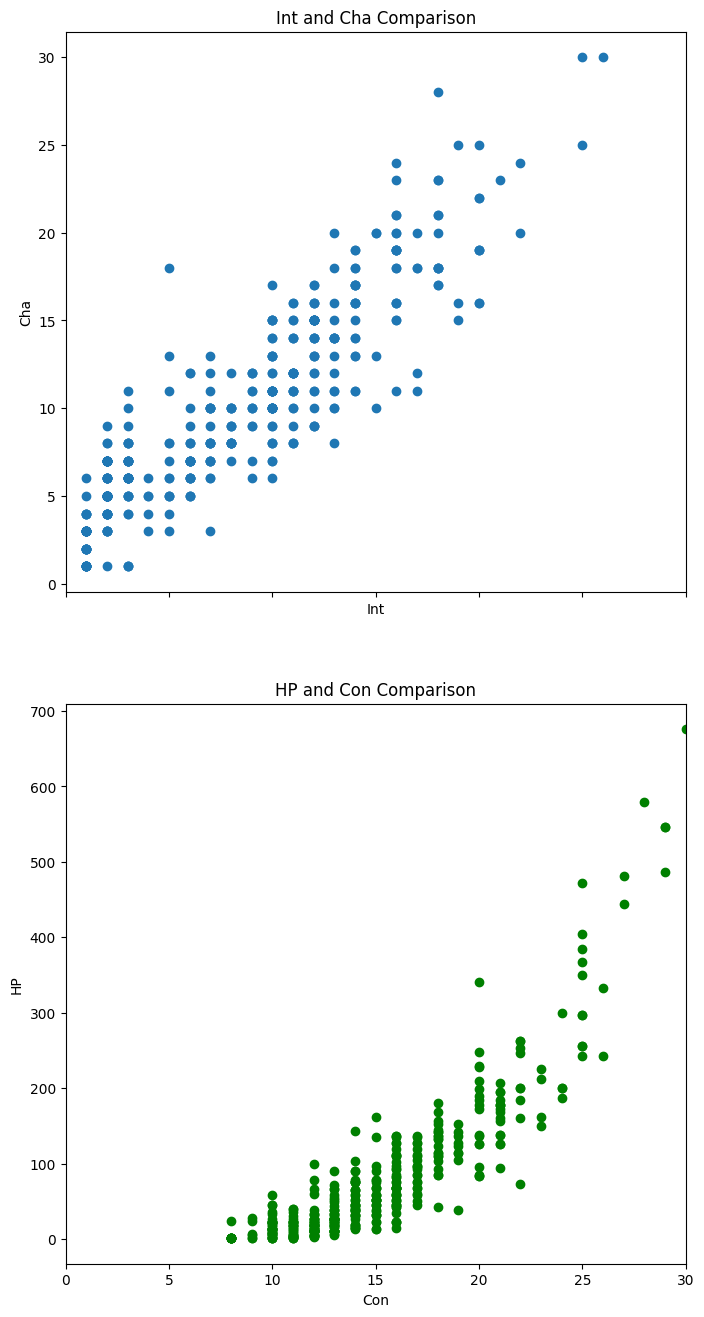

In [17]:
# Create scatter plot to see int vs cha

fig, (ax0,ax1) = plt.subplots(nrows=2,
                             ncols=1,
                              figsize=(8,16),
                              sharex=True
                             )

scatter = ax0.scatter(x=monsters_df['int'],
                    y=monsters_df['cha'],
                    )

ax0.set_xlim([0, 30])

ax0.set(title='Int and Cha Comparison',
        xlabel='Int',
        ylabel='Cha')

# Create scatter plot to see hp vs con

scatter = ax1.scatter(x=monsters_df['con'],
                    y=monsters_df['hp'],
                    c='green'
                    )

ax1.set(title='HP and Con Comparison',
        xlabel='Con',
        ylabel='HP');

In [18]:
# Find monsters with highest cha with low int

monsters_df.loc[(monsters_df['cha']-monsters_df['int']) == max(monsters_df['cha']-monsters_df['int'])]

,name,url,cr,type,size,ac,hp,speed,align,legendary,source,str,dex,con,int,wis,cha
54,astral-dreadnought,https://www.aidedd.org/dnd/monstres.php?vo=ast...,21,monstrosity (titan),Gargantuan,20,297,fly,unaligned,Legendary,Mordenkainen's Tome of Foes,28.0,7.0,25.0,5.0,14.0,18.0


In [19]:
# Find monsters with the biggest difference between int and cha

monsters_df.loc[(monsters_df['int']-monsters_df['cha']) == max(monsters_df['int']-monsters_df['cha'])]

,name,url,cr,type,size,ac,hp,speed,align,legendary,source,str,dex,con,int,wis,cha
418,mage,https://www.aidedd.org/dnd/monstres.php?vo=mage,6,humanoid (any race),Medium,12,40,NaN,any alignment,NaN,Monster Manual (SRD),9.0,14.0,11.0,17.0,12.0,11.0
